# First Convolution Neural Network

## Import Library

In [1]:
import numpy as np

from tensorflow.keras.layers import Input, Flatten, Dense, Conv2D, BatchNormalization, LeakyReLU, Dropout, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10

## Load data

In [2]:
NUM_CLASSES = 10

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

## Create model

In [4]:
input_layer = Input(shape=(32,32,3))

conv_layer_1 = Conv2D(
    filters=10
    , kernel_size=(4,4)
    , strides=2
    , padding='same'
    )(input_layer)

conv_layer_2 = Conv2D(
    filters=20
    , kernel_size=(3,3)
    , strides=2
    , padding='same'
    )(conv_layer_1)

flatten_layer = Flatten()(conv_layer_2)

output_layer = Dense(units=10, activation = 'softmax')(flatten_layer)

model = Model(input_layer, output_layer)

In [5]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 16, 16, 10)        490       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 20)          1820      
_________________________________________________________________
flatten (Flatten)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                12810     
Total params: 15,120
Trainable params: 15,120
Non-trainable params: 0
_________________________________________________________________


In [6]:
input_layer = Input((32,32,3))

x = Conv2D(filters=32, kernel_size=3, strides=1, padding='same')(input_layer)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters=32, kernel_size=3, strides=2, padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters=64, kernel_size=3, strides=1, padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters=64, kernel_size=3, strides=2, padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Flatten()(x)

x = Dense(128)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate = 0.5)(x)

x = Dense(NUM_CLASSES)(x)
output_layer = Activation('softmax')(x)

model2 = Model(input_layer, output_layer)

In [7]:
model2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 16, 16, 32)        0   

## Model Compilation and Fitting

In [8]:
opt = Adam(learning_rate=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model2.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [9]:
model.fit(x_train, 
          y_train, 
          batch_size=32, 
          epochs=10, 
          shuffle=True, 
          validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 9s 2ms/step - loss: 1.8514 - accuracy: 0.3528 - val_loss: 1.7385 - val_accuracy: 0.4012
Epoch 2/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.7402 - accuracy: 0.4013 - val_loss: 1.7392 - val_accuracy: 0.3946
Epoch 3/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.7194 - accuracy: 0.4118 - val_loss: 1.7181 - val_accuracy: 0.4109
Epoch 4/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.7097 - accuracy: 0.4148 - val_loss: 1.7153 - val_accuracy: 0.4089
Epoch 5/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.7011 - accuracy: 0.4218 - val_loss: 1.7104 - val_accuracy: 0.4108
Epoch 6/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.6946 - accuracy: 0.4249 - val_loss: 1.7252 - val_accuracy: 0.4088
Epoch 7/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.6894 - accuracy: 0.4255 - val_loss: 1.7056 - val_accuracy:

In [10]:
model2.fit(x_train, 
          y_train, 
          batch_size=32, 
          epochs=10, 
          shuffle=True, 
          validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 8s 4ms/step - loss: 1.4945 - accuracy: 0.4658 - val_loss: 1.1701 - val_accuracy: 0.5898
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1195 - accuracy: 0.6062 - val_loss: 1.0185 - val_accuracy: 0.6366
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9807 - accuracy: 0.6589 - val_loss: 0.8926 - val_accuracy: 0.6853
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9031 - accuracy: 0.6840 - val_loss: 0.8552 - val_accuracy: 0.6990
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8471 - accuracy: 0.7044 - val_loss: 0.8494 - val_accuracy: 0.7048
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7988 - accuracy: 0.7233 - val_loss: 0.8729 - val_accuracy: 0.6925
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7595 - accuracy: 0.7344 - val_loss: 0.8791 - val_accuracy:

## Model Evaluation

In [11]:
model.evaluate(x_test, y_test, batch_size=1000)

10/10 [==============================] - 0s 3ms/step - loss: 1.7115 - accuracy: 0.4124


[1.711484432220459, 0.4124000072479248]

In [12]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

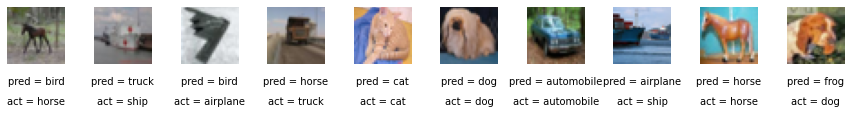

In [13]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)

In [14]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model2.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

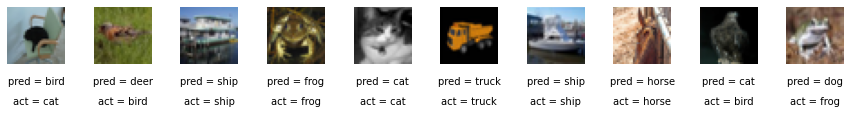

In [15]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)